In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.cluster.hierarchy as sch
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import norm
from scipy.optimize import minimize

df = pd.read_csv("./Clean/clean-huf-spy-extended.csv")
df = df.drop(columns=['Unnamed: 0'])
df.set_index('Dátum', inplace=True)
df = df[::-1]
annual_risk_free_rate = 0.02
daily_risk_free_rate = (1 + annual_risk_free_rate)**(1/252) - 1

benchmark = 'S&P 500'
interesting = ['Citadella_Származtatott_Relative_Return', 'Erste_Stock_Hungary_Indexkövető_Részvény_A_Relative_Return',
               'SP500_Relative_Return', 'HOLD_Nemzetközi_Relative_Return', 'OTP_Supra_Relative_Return', 'HOLD_Columbus_Relative_Return']
# Create a dictionary to rename the columns to something simpler
rename_dict = {
    'Citadella_Származtatott_Relative_Return': 'Citadella',
    'Erste_Stock_Hungary_Indexkövető_Részvény_A_Relative_Return': 'Erste Indexkövető',
    'Generali_Arany_Oroszlán_ESG_Relative_Return': 'Generali ESG',
    'HOLD_Columbus_Relative_Return': 'HOLD Columbus',
    'HOLD_Nemzetközi_Relative_Return': 'HOLD Nemzetközi',
    'HOLD_VM_Abszolút_Származtatott_Befektetési_Relative_Return': 'HOLD Abszolút',
    'MBH_Fejlett_Piaci_Részvény_Relative_Return': 'MBH Fejlett Piaci',
    'OTP_Klímaváltozás_13030_Relative_Return': 'OTP Klímaváltozás',
    'OTP_Supra_Relative_Return': 'OTP Supra',
    'VIG_Opportunity_Fejlett_Piaci_Részvény_Relative_Return': 'VIG Opportunity',
    'Accorde_Abacus_Alap_Relative_Return': 'Accord Abacus',
    'Accorde_Prizma_Alap_Relative_Return': 'Accord Prizma',
    'HOLD_Orion_Relative_Return': 'HOLD Orion',    
    'SP500_Relative_Return': benchmark
}


# Apply the renaming
df = df.rename(columns=rename_dict)
daily_returns = df.pct_change().dropna()


C:\Users\takat\AppData\Local\Temp\ipykernel_7256\3107834348.py:42: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = df.pct_change().dropna()


In [38]:
def draw_decreasing_barchart(data, title, x_label, y_label):
    data = data.sort_values(ascending=False)
    plt.figure(figsize=(12, 8))
    data.plot(kind='bar', color='skyblue')
    plt.title(title, fontsize=16)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()
    
def draw_linchart(data, title, x_label, y_label):
    
    plt.figure(figsize=(12, 8))
    for column in data.columns:
        plt.plot(pd.to_datetime(data.index), data[column], label=column)

    plt.axvline(pd.to_datetime('2020-03-16'), color='red', linestyle='--', label='COVID Crash')
    plt.title(title)
    plt.xlabel(x_label)
    plt.legend()
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()

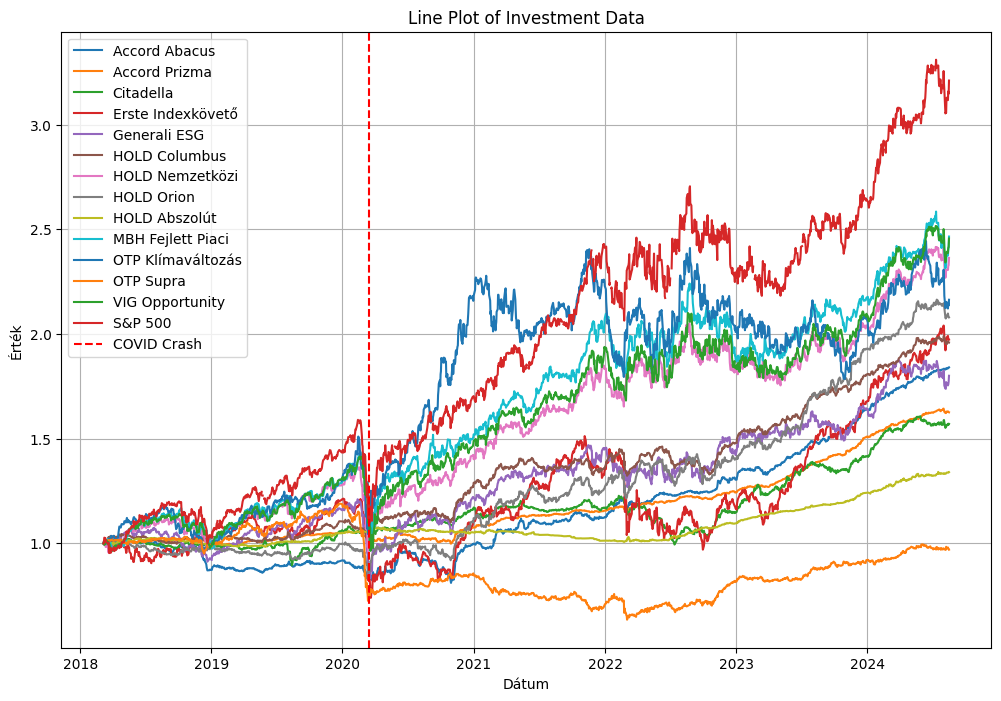

In [39]:
draw_linchart(df, 'Line Plot of Investment Data', 'Dátum', 'Érték' )

In [40]:
average_daily_returns = daily_returns.mean()
excess_returns = daily_returns - daily_risk_free_rate
std_dev_returns = daily_returns.std()
sharpe_ratios_daily = average_daily_returns / std_dev_returns
sharpe_ratios_annualized = sharpe_ratios_daily * np.sqrt(252)
sharpe_ratios_df = pd.DataFrame({
    'Average Daily Return': average_daily_returns,
    'Standard Deviation of Returns': std_dev_returns,
    'Daily Sharpe Ratio': sharpe_ratios_daily,
    'Annualized Sharpe Ratio': sharpe_ratios_annualized
})
sharpe_ratios_df

,Average Daily Return,Standard Deviation of Returns,Daily Sharpe Ratio,Annualized Sharpe Ratio
Accord Abacus,0.000394,0.005405,0.072837,1.156258
Accord Prizma,0.000304,0.001942,0.156564,2.485377
Citadella,0.000291,0.004649,0.062679,0.995003
Erste Indexkövető,0.000516,0.013584,0.037958,0.602571
Generali ESG,0.000420,0.010458,0.040192,0.638031
HOLD Columbus,0.000431,0.005022,0.085754,1.361310
HOLD Nemzetközi,0.000598,0.011217,0.053278,0.845768
HOLD Orion,0.000478,0.006757,0.070719,1.122630
HOLD Abszolút,0.000184,0.001795,0.102233,1.622892
MBH Fejlett Piaci,0.000629,0.011644,0.054000,0.857226


Sortino Ratios:
 Accord Abacus        1.310123
Accord Prizma        2.443031
Citadella            0.966759
Erste Indexkövető    0.606668
Generali ESG         0.680676
HOLD Columbus        1.536555
HOLD Nemzetközi      0.955448
HOLD Orion           1.295391
HOLD Abszolút        1.250645
MBH Fejlett Piaci    0.983909
OTP Klímaváltozás    0.801726
OTP Supra           -0.133831
VIG Opportunity      0.939479
S&P 500              1.079037
dtype: float64


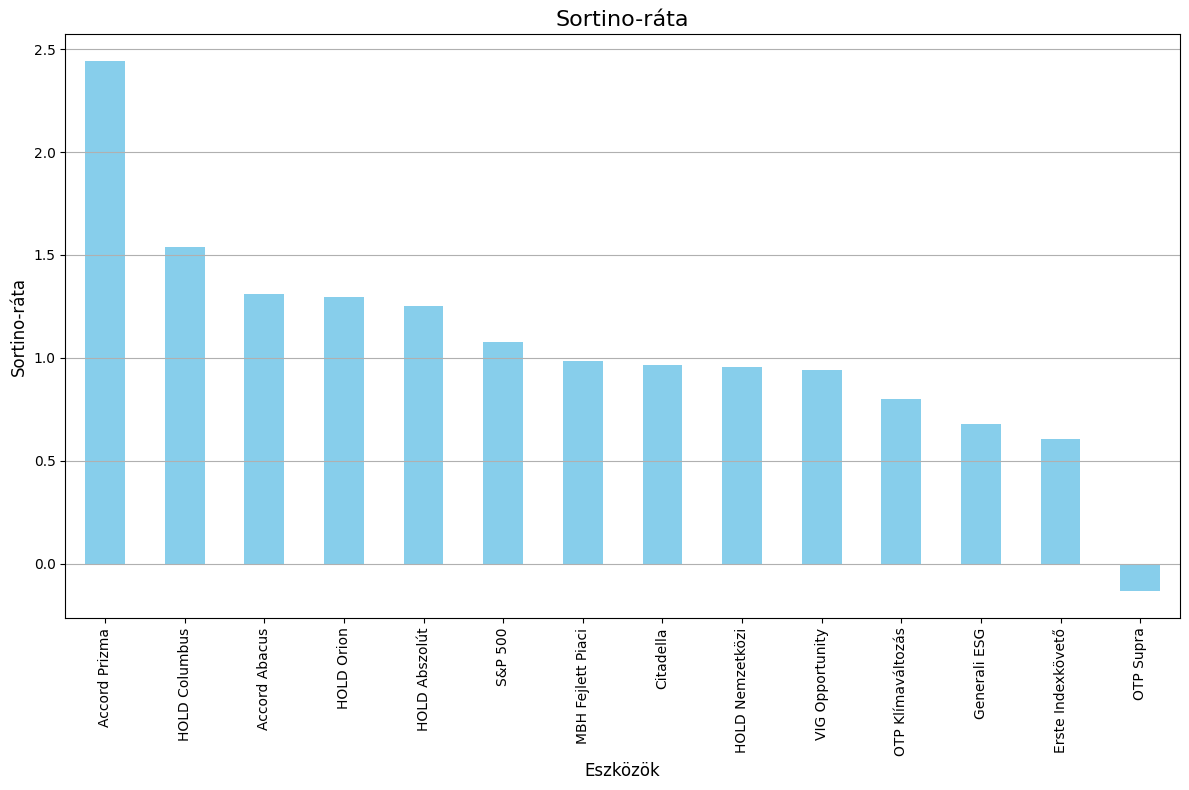

Treynor Ratios:
 Accord Abacus        0.018533
Accord Prizma        0.014042
Citadella            0.018969
Erste Indexkövető   -0.002756
Generali ESG         0.000822
HOLD Columbus        0.014460
HOLD Nemzetközi     -0.006937
HOLD Orion           0.005293
HOLD Abszolút        0.019632
MBH Fejlett Piaci    0.005568
OTP Klímaváltozás    0.001797
OTP Supra            0.001790
VIG Opportunity      0.018013
S&P 500              0.000750
dtype: float64


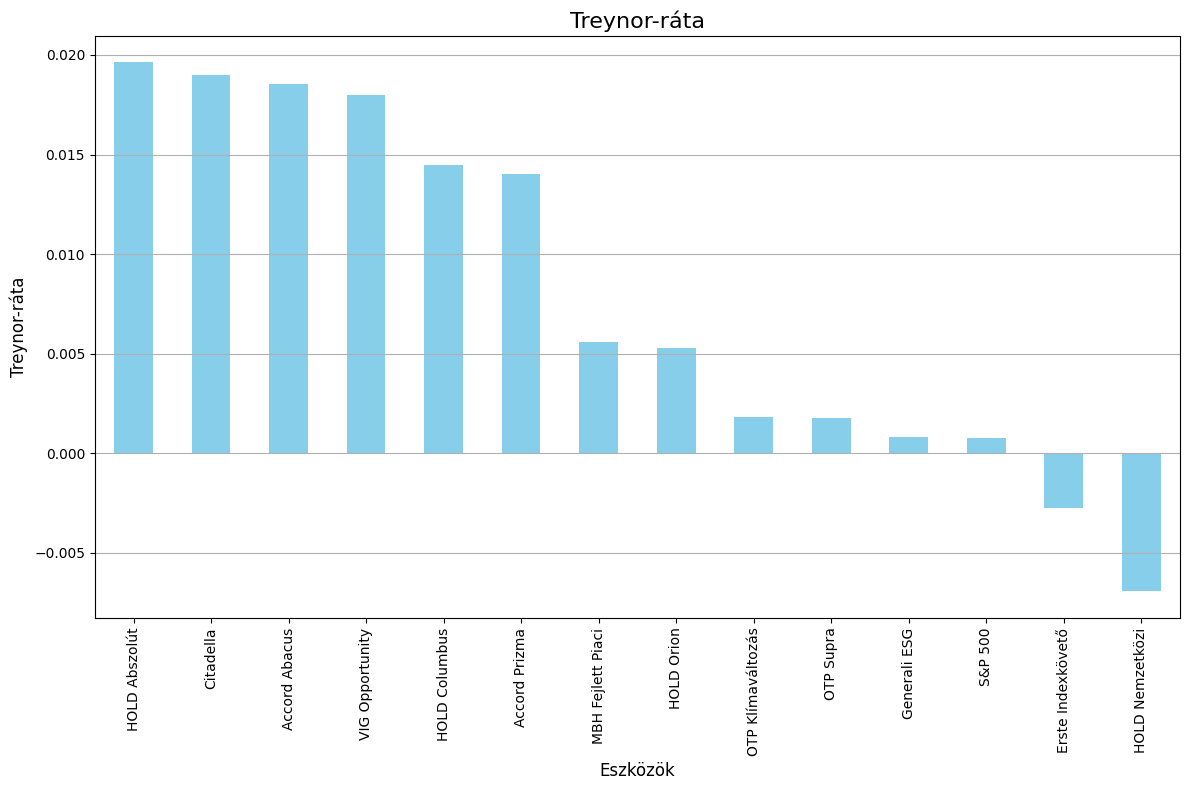

In [41]:
def sortino_ratio(returns, target=0):
    excess_returns = returns - target
    downside_deviation = np.std(excess_returns[excess_returns < target])
    sortino_ratio = np.mean(excess_returns) / downside_deviation
    sortino_ratio_annualized = sortino_ratio * np.sqrt(252)
    
    return sortino_ratio_annualized
sortino_ratios = daily_returns.apply(sortino_ratio, target=daily_risk_free_rate)
print("Sortino Ratios:\n", sortino_ratios)
draw_decreasing_barchart(sortino_ratios, 'Sortino-ráta', 'Eszközök', 'Sortino-ráta')

def treynor_ratio(returns, market_returns, beta, daily_risk_free_rate):
    excess_returns = np.mean(returns) - daily_risk_free_rate
    treynor_ratio = excess_returns / beta
    return treynor_ratio

market_returns = daily_returns[benchmark]
betas = daily_returns.apply(lambda x: np.cov(x, market_returns)[0, 1] / np.var(market_returns))
treynor_ratios = daily_returns.apply(lambda x: treynor_ratio(x, market_returns, betas[x.name], daily_risk_free_rate))
print("Treynor Ratios:\n", treynor_ratios)
draw_decreasing_barchart(treynor_ratios, 'Treynor-ráta', 'Eszközök', 'Treynor-ráta')


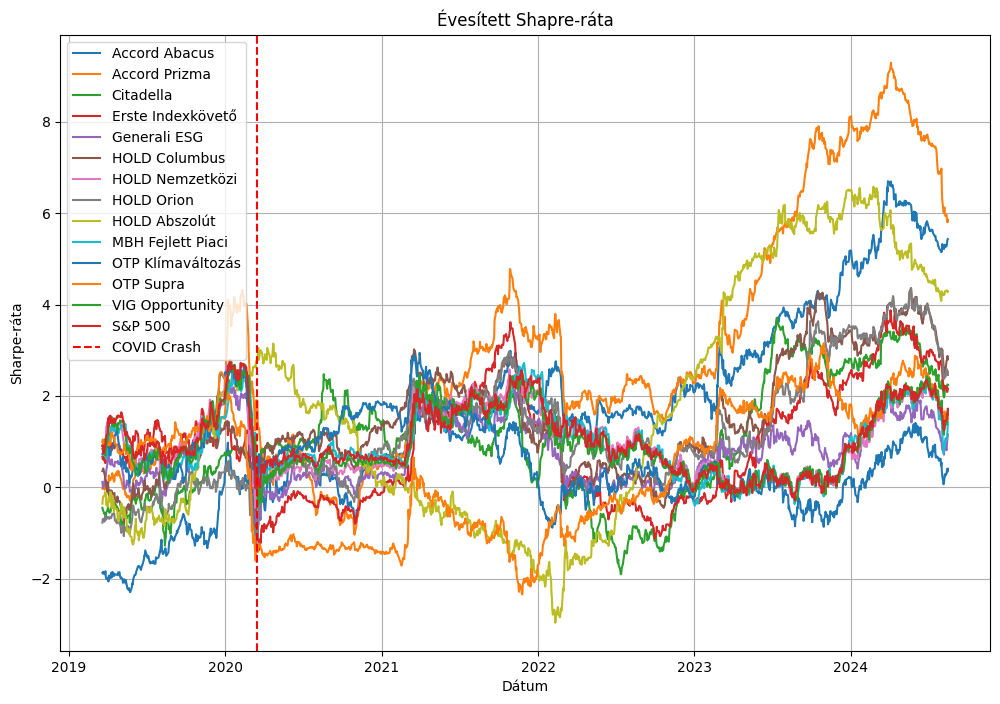

In [42]:
window_size = 252
rolling_sharpe_ratios = (
    daily_returns.rolling(window=window_size).mean() / 
    daily_returns.rolling(window=window_size).std()
) * np.sqrt(252)
draw_linchart(rolling_sharpe_ratios, 'Évesített Shapre-ráta', 'Dátum', 'Sharpe-ráta')


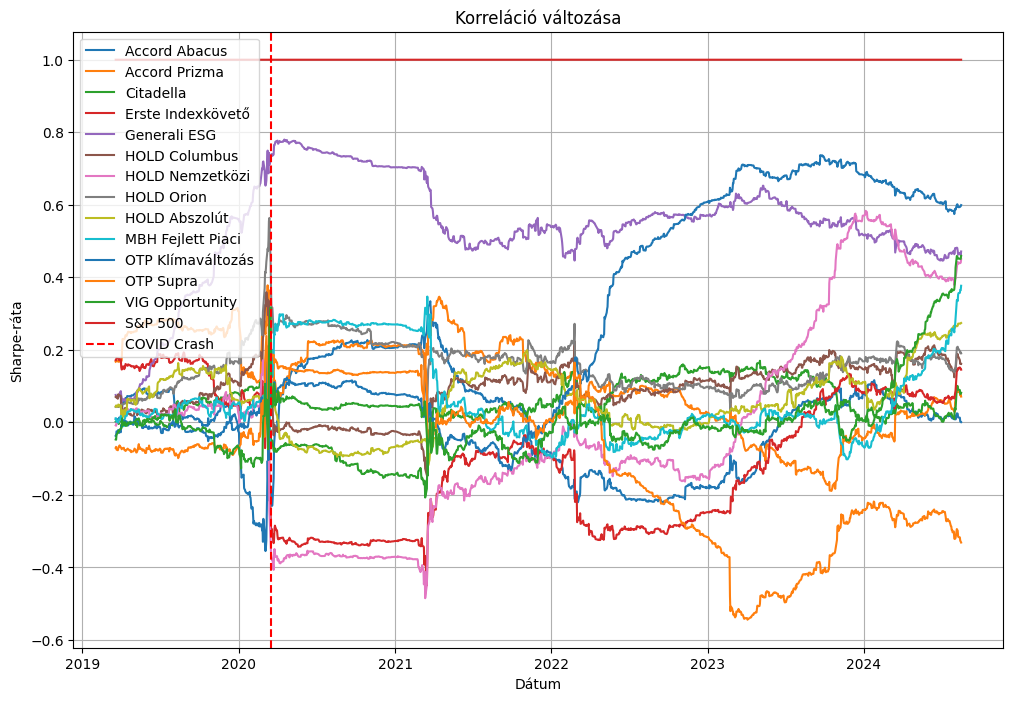

In [43]:
rolling_correlations = daily_returns.rolling(window=window_size).corr(daily_returns[benchmark])
draw_linchart(rolling_correlations, 'Korreláció változása', 'Dátum', 'Sharpe-ráta')


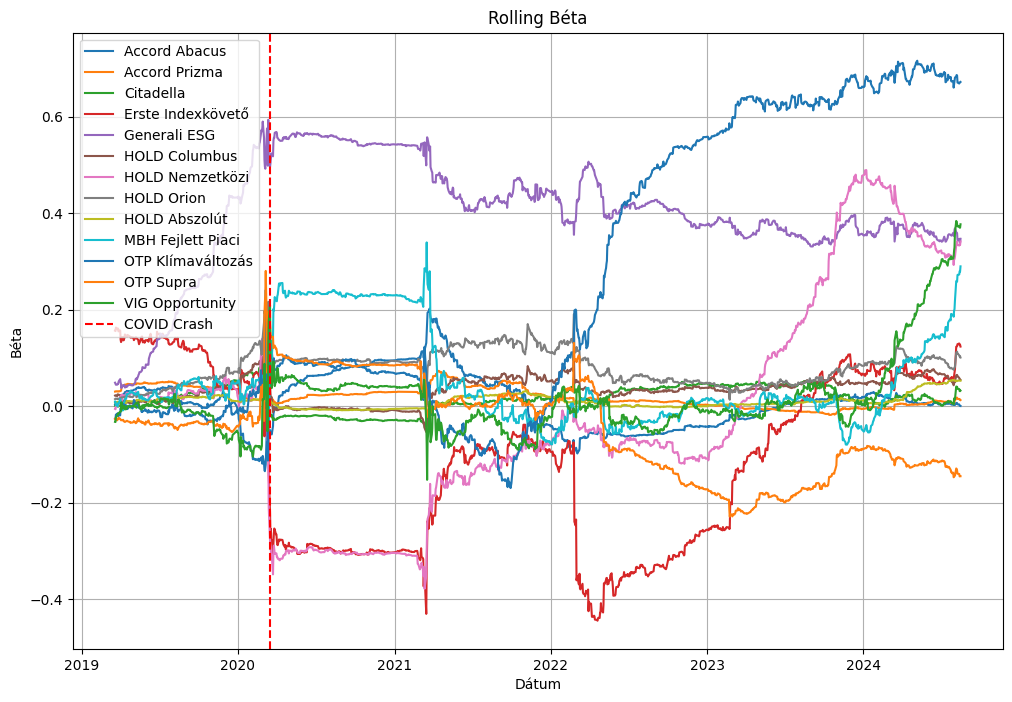

In [44]:
benchmark_returns = daily_returns[benchmark]
window_size = 252
betas = pd.DataFrame(index=daily_returns.index)
for column in daily_returns.columns:
    if column != benchmark: 
        rolling_covariance = daily_returns[column].rolling(window=window_size).cov(benchmark_returns)
        rolling_variance = benchmark_returns.rolling(window=window_size).var()
        rolling_beta = rolling_covariance / rolling_variance
        betas[column] = rolling_beta    
draw_linchart(betas, 'Rolling Béta', 'Dátum', 'Béta')


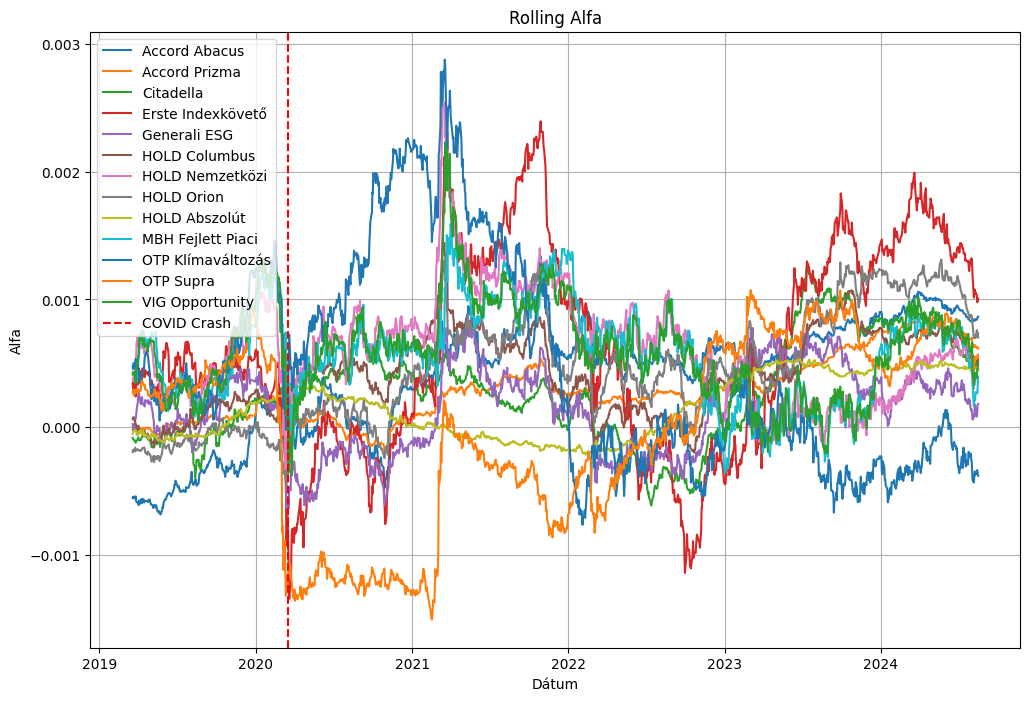

In [45]:
alphas = pd.DataFrame(index=daily_returns.index)
for column in daily_returns.columns:
    if column != benchmark:  # Skip the benchmark itself
        rolling_covariance = daily_returns[column].rolling(window=window_size).cov(benchmark_returns)
        rolling_variance = benchmark_returns.rolling(window=window_size).var()
        rolling_beta = rolling_covariance / rolling_variance
        expected_returns = rolling_beta * (benchmark_returns.rolling(window=window_size).mean() - daily_risk_free_rate)
        rolling_alpha = daily_returns[column].rolling(window=window_size).mean() - expected_returns
        alphas[column] = rolling_alpha
draw_linchart(alphas, 'Rolling Alfa', 'Dátum', 'Alfa')

HOLD Nemzetközi      0.000614
Erste Indexkövető    0.000603
VIG Opportunity      0.000598
MBH Fejlett Piaci    0.000578
HOLD Orion           0.000469
OTP Klímaváltozás    0.000461
HOLD Columbus        0.000423
Accord Abacus        0.000409
Citadella            0.000295
Accord Prizma        0.000290
HOLD Abszolút        0.000158
Generali ESG         0.000142
OTP Supra           -0.000010
dtype: float64


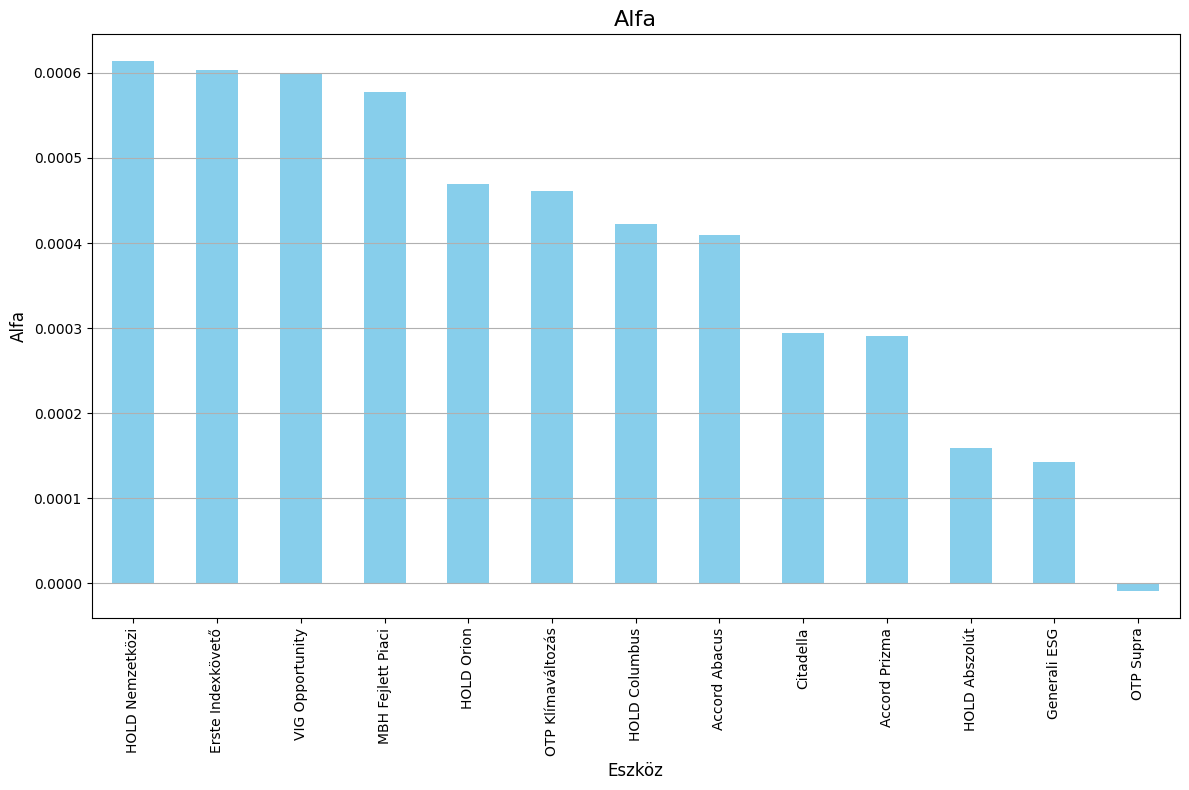

In [46]:
mean_alphas = alphas.mean()
mean_alphas = mean_alphas.sort_values(ascending=False)
print(mean_alphas)
draw_decreasing_barchart(mean_alphas, 'Alfa', 'Eszköz', 'Alfa')

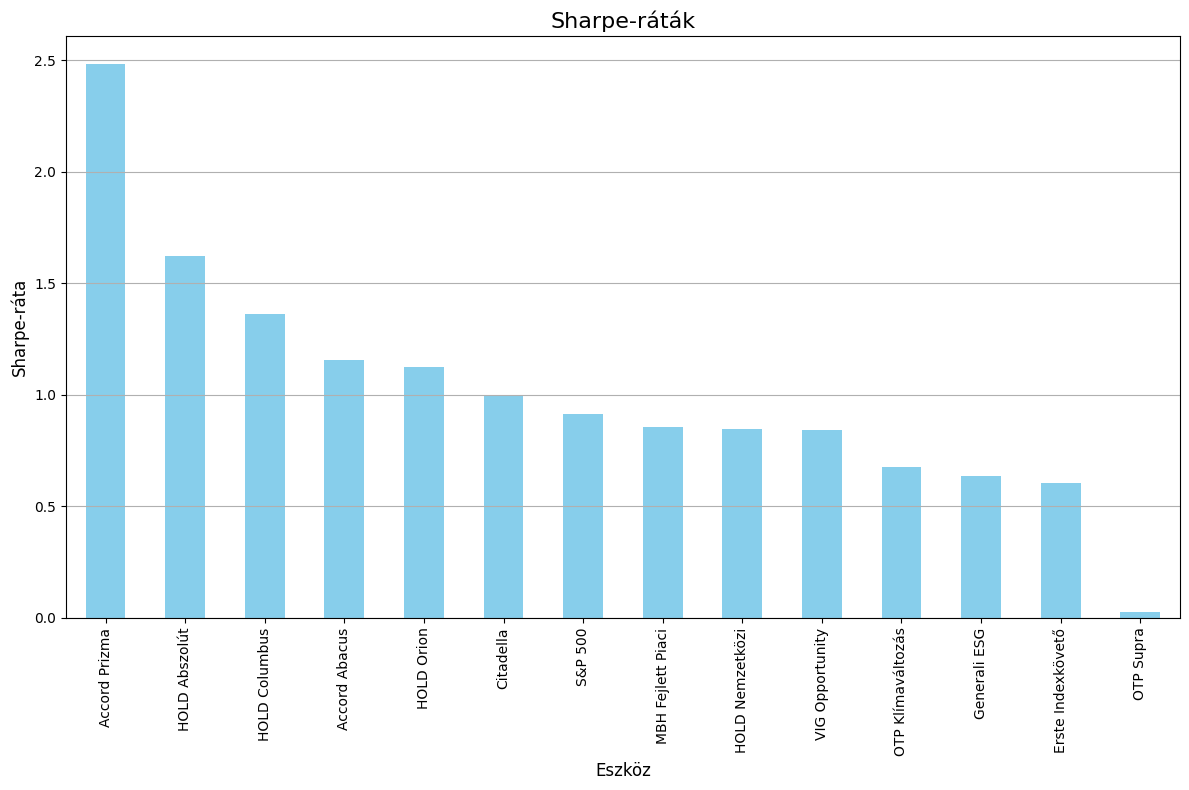

In [47]:
# Sort the Sharpe Ratios in descending order for the bar chart
sorted_sharpe_ratios = sharpe_ratios_df['Annualized Sharpe Ratio'].sort_values(ascending=False)
draw_decreasing_barchart(sorted_sharpe_ratios, 'Sharpe-ráták', 'Eszköz', 'Sharpe-ráta')


C:\Users\takat\AppData\Local\Temp\ipykernel_7256\3352012754.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = sch.linkage(distance_matrix, method='average')


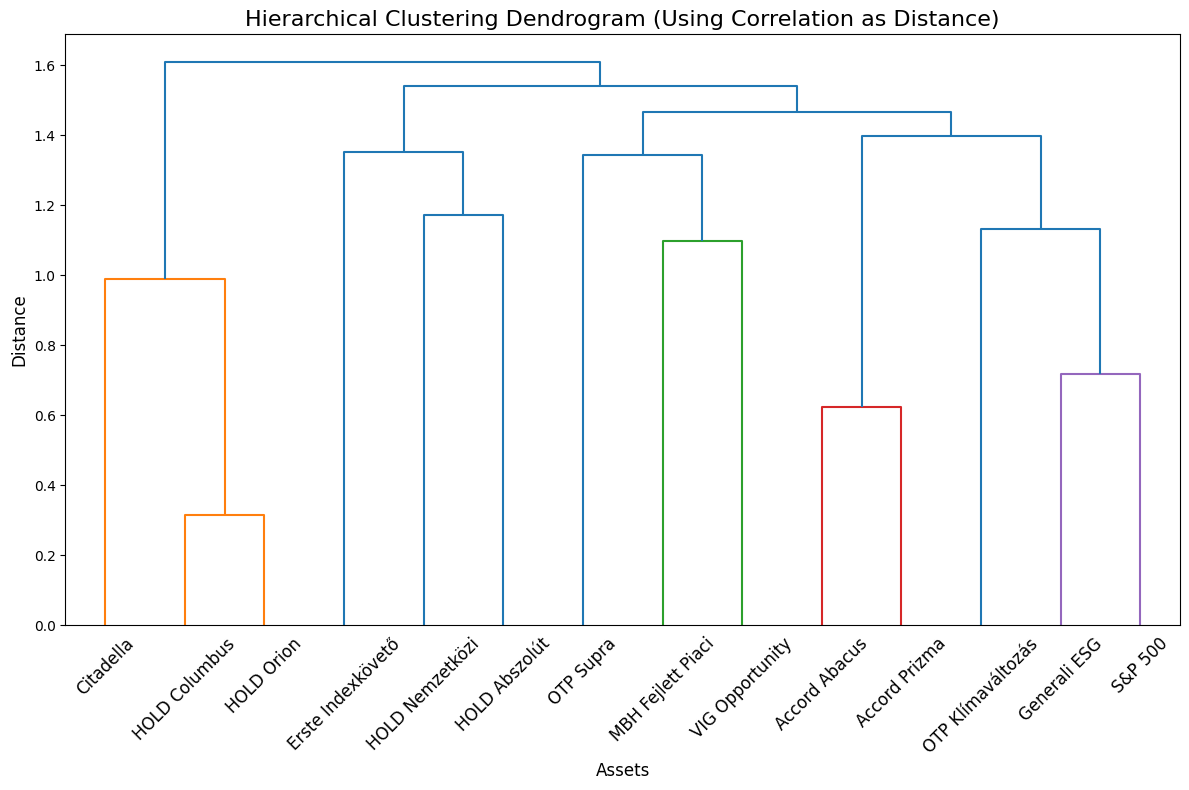

In [48]:
correlation_matrix = daily_returns.corr()
distance_matrix = 1 - correlation_matrix
linked = sch.linkage(distance_matrix, method='average')
plt.figure(figsize=(12, 8))
sch.dendrogram(linked, labels=correlation_matrix.columns, orientation='top')
plt.title('Hierarchical Clustering Dendrogram (Using Correlation as Distance)', fontsize=16)
plt.xlabel('Assets', fontsize=12, )
plt.xticks(rotation=45,)
plt.ylabel('Distance', fontsize=12)
plt.tight_layout()
plt.show()

In [49]:
df.index = pd.to_datetime(df.index)
yearly_returns = df.resample('Y').last().pct_change().dropna()
average_yearly_returns = yearly_returns.mean()
std_dev_yearly_returns = yearly_returns.std()
sharpe_ratios_yearly = (average_yearly_returns - annual_risk_free_rate) / std_dev_yearly_returns
sharpe_ratios_yearly_df = pd.DataFrame({
    'Average Yearly Return': average_yearly_returns,
    'Standard Deviation of Yearly Returns': std_dev_yearly_returns,
    'Yearly Sharpe Ratio': sharpe_ratios_yearly
})
sharpe_ratios_yearly_df

C:\Users\takat\AppData\Local\Temp\ipykernel_7256\4291094125.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_returns = df.resample('Y').last().pct_change().dropna()


,Average Yearly Return,Standard Deviation of Yearly Returns,Yearly Sharpe Ratio
Accord Abacus,0.133797,0.071686,1.587438
Accord Prizma,0.088673,0.064783,1.060048
Citadella,0.082148,0.091476,0.679386
Erste Indexkövető,0.131798,0.212459,0.526211
Generali ESG,0.120010,0.096735,1.033853
HOLD Columbus,0.116175,0.063215,1.521395
HOLD Nemzetközi,0.160466,0.121704,1.154162
HOLD Orion,0.139956,0.120249,0.997563
HOLD Abszolút,0.052036,0.061373,0.521993
MBH Fejlett Piaci,0.169823,0.156225,0.959018


C:\Users\takat\AppData\Local\Temp\ipykernel_7256\2151974488.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  correlation_matrix = df.pct_change().dropna().corr()


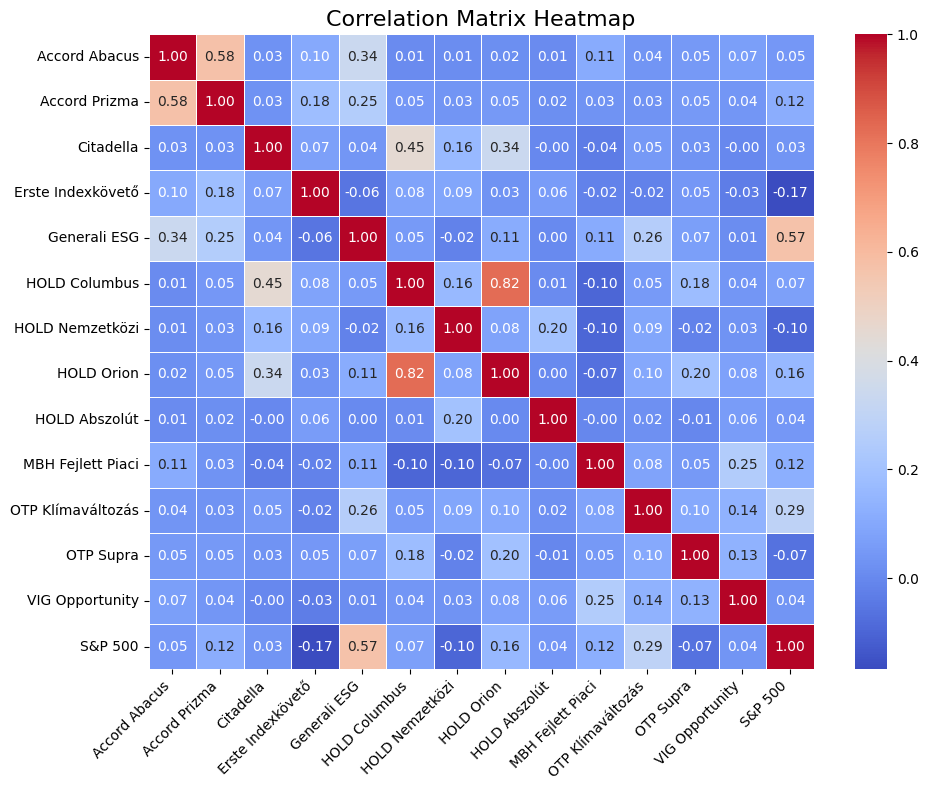

In [50]:
correlation_matrix = df.pct_change().dropna().corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

C:\Users\takat\AppData\Local\Temp\ipykernel_7256\1685487539.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_returns = df.resample('M').last().pct_change().dropna()


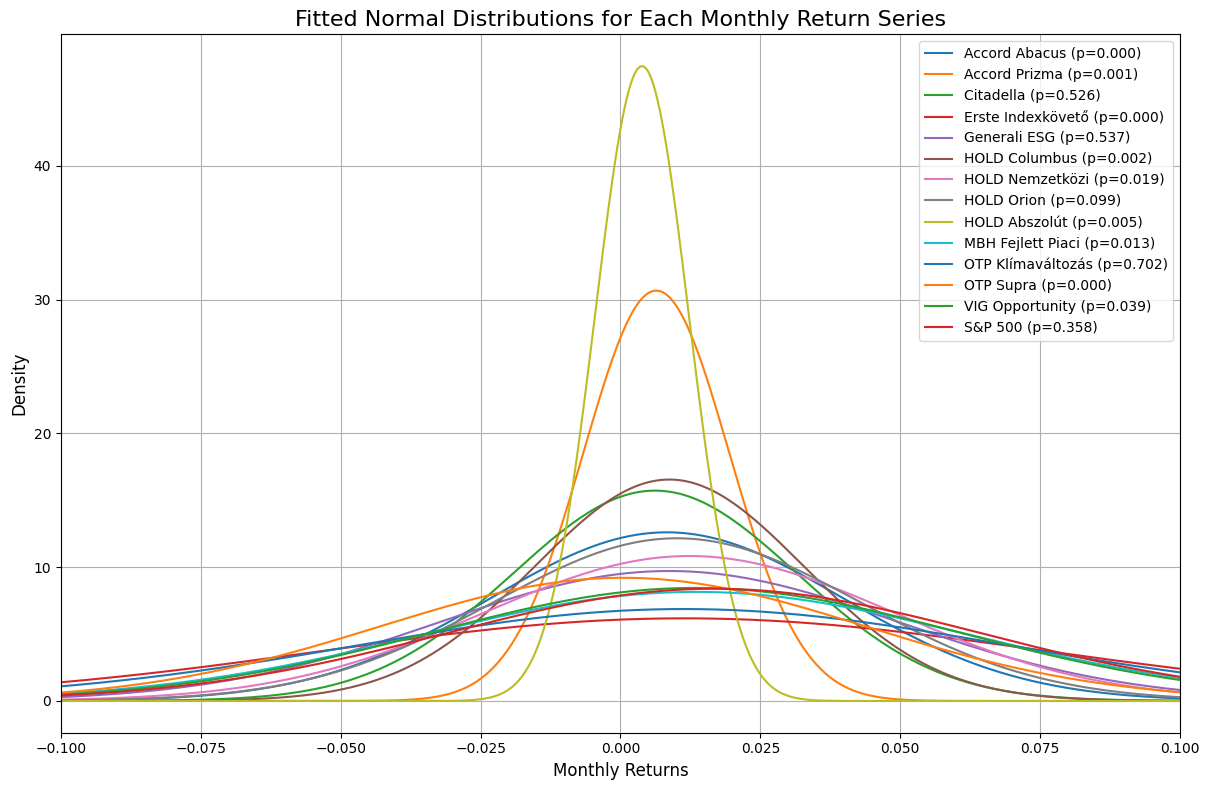

{'Accord Abacus': {'W-statistic': 0.8487884998321533,
  'p-value': 2.2411708755498694e-07,
  'is_normal': False},
 'Accord Prizma': {'W-statistic': 0.9326396584510803,
  'p-value': 0.0005203727050684392,
  'is_normal': False},
 'Citadella': {'W-statistic': 0.9854085445404053,
  'p-value': 0.5259420871734619,
  'is_normal': True},
 'Erste Indexkövető': {'W-statistic': 0.9093533158302307,
  'p-value': 4.274898310541175e-05,
  'is_normal': False},
 'Generali ESG': {'W-statistic': 0.9855968952178955,
  'p-value': 0.5372390747070312,
  'is_normal': True},
 'HOLD Columbus': {'W-statistic': 0.944297194480896,
  'p-value': 0.0020929372403770685,
  'is_normal': False},
 'HOLD Nemzetközi': {'W-statistic': 0.9610010385513306,
  'p-value': 0.018563536927103996,
  'is_normal': False},
 'HOLD Orion': {'W-statistic': 0.9729505181312561,
  'p-value': 0.09949459880590439,
  'is_normal': True},
 'HOLD Abszolút': {'W-statistic': 0.9513146281242371,
  'p-value': 0.0050937035121023655,
  'is_normal': False

In [51]:
monthly_returns = df.resample('M').last().pct_change().dropna()
shapiro_test_results_monthly = {}
x = np.linspace(-0.2, 0.2, 1000)
plt.figure(figsize=(12, 8))
for column in monthly_returns.columns:
    try:
        returns = monthly_returns[column].dropna()
        W, p_value = shapiro(returns)
        shapiro_test_results_monthly[column] = {
            'W-statistic': W,
            'p-value': p_value,
            'is_normal': p_value > 0.05
        }
        mu, std = norm.fit(returns)
        fitted_curve = norm.pdf(x, mu, std)
        plt.plot(x, fitted_curve, label=f"{column} (p={p_value:.3f})")
    except Exception as e:
        shapiro_test_results_monthly[column] = {
            'W-statistic': None,
            'p-value': None,
            'is_normal': False,
            'error': str(e)
        }
plt.title('Fitted Normal Distributions for Each Monthly Return Series', fontsize=16)
plt.xlabel('Monthly Returns', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xlim(-0.1,0.1)
plt.show()
shapiro_test_results_monthly

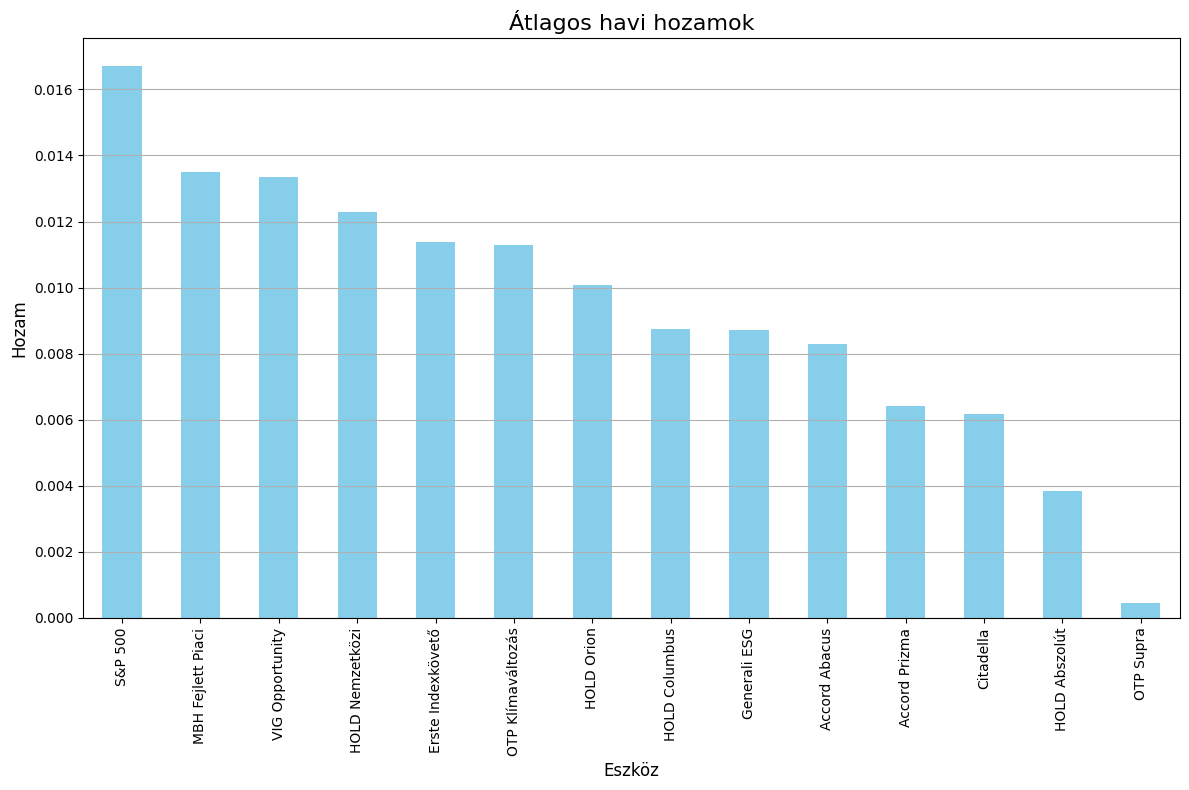

In [52]:
monthly_means = monthly_returns.mean()
draw_decreasing_barchart(monthly_means, 'Átlagos havi hozamok', 'Eszköz', 'Hozam')

Max Drawdowns:
 Accord Abacus       -0.205121
Accord Prizma       -0.054911
Citadella           -0.189678
Erste Indexkövető   -0.390196
Generali ESG        -0.311816
HOLD Columbus       -0.114939
HOLD Nemzetközi     -0.296252
HOLD Orion          -0.150442
HOLD Abszolút       -0.064689
MBH Fejlett Piaci   -0.274339
OTP Klímaváltozás   -0.308348
OTP Supra           -0.466067
VIG Opportunity     -0.319097
S&P 500             -0.309207
dtype: float64
Calmar Ratios:
 Accord Abacus        0.483701
Accord Prizma        1.395138
Citadella            0.387139
Erste Indexkövető    0.333019
Generali ESG         0.339713
HOLD Columbus        0.944112
HOLD Nemzetközi      0.508375
HOLD Orion           0.800421
HOLD Abszolút        0.714916
MBH Fejlett Piaci    0.577574
OTP Klímaváltozás    0.465786
OTP Supra            0.007423
VIG Opportunity      0.496466
S&P 500              0.675292
dtype: float64
Recovery Times:
 Accord Abacus        10
Accord Prizma        11
Citadella             7
Erste Ind

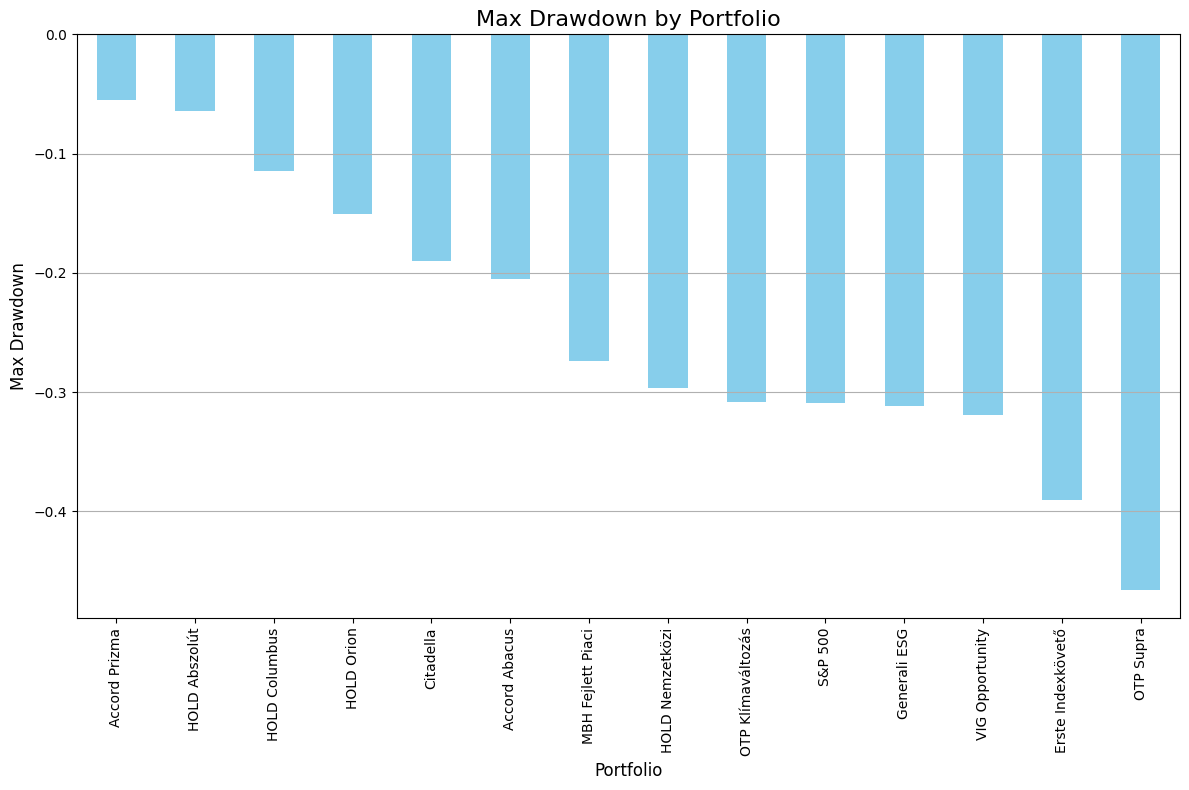

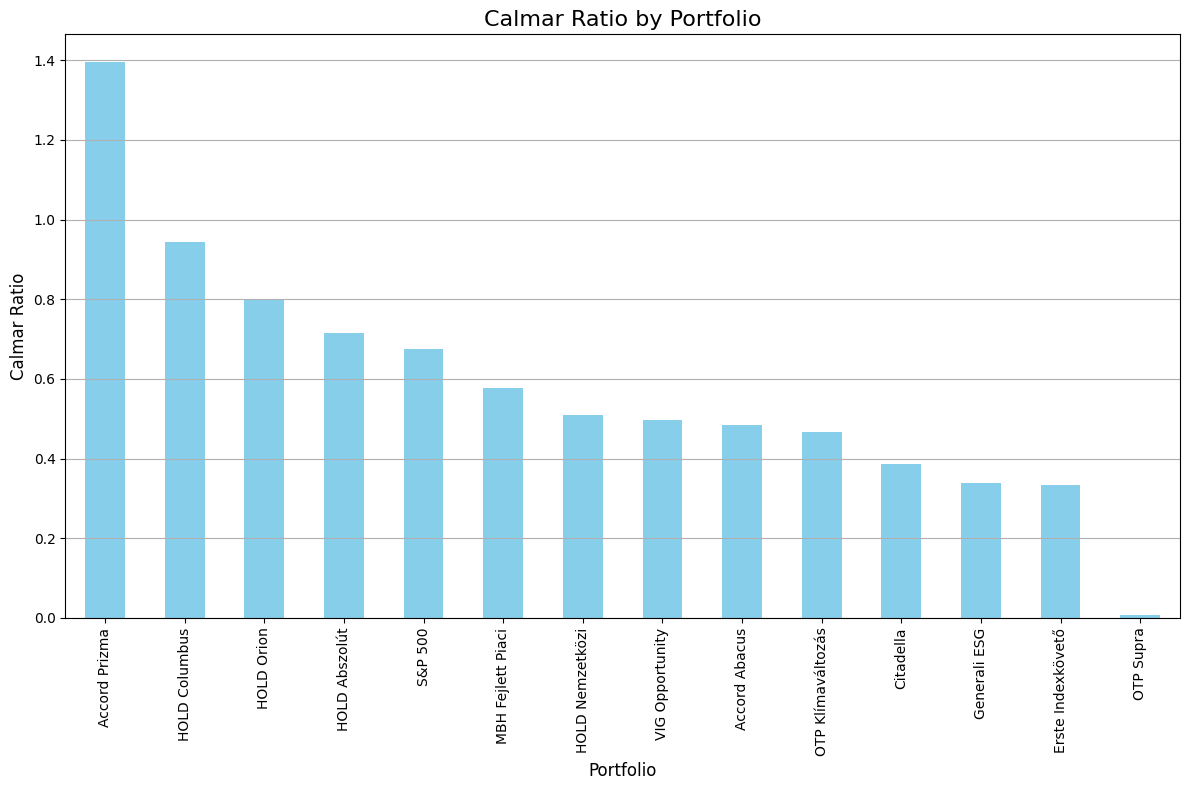

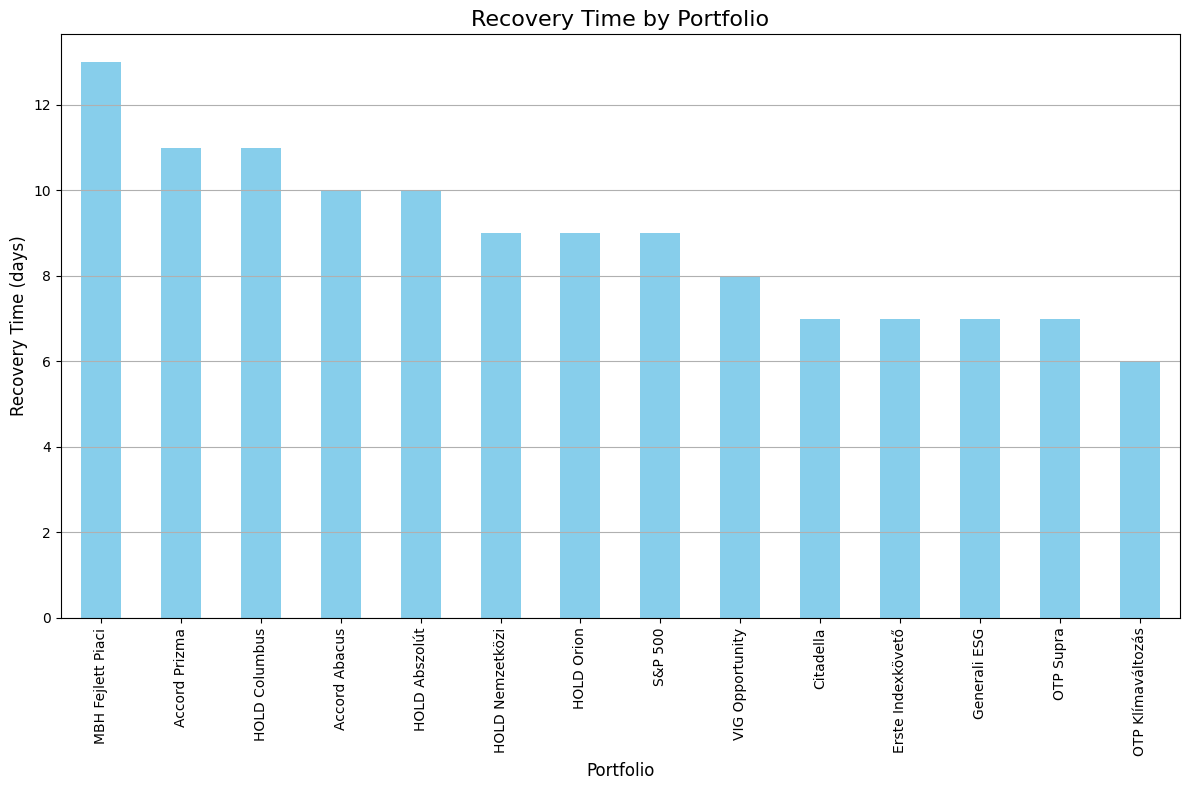

In [53]:

def max_drawdown(returns):
    cumulative_returns = (1 + returns).cumprod()
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak
    max_drawdown_value = drawdown.min()
    return max_drawdown_value

# Apply the Max Drawdown function to each portfolio
max_drawdowns = daily_returns.apply(max_drawdown)
print("Max Drawdowns:\n", max_drawdowns)

# 2. Calmar Ratio
def calmar_ratio(annualized_return, max_drawdown):
    return annualized_return / abs(max_drawdown)

# Calculate the annualized return for each portfolio
annualized_returns = daily_returns.mean() * 252

# Apply the Calmar Ratio function to each portfolio
calmar_ratios = pd.Series({col: calmar_ratio(annualized_returns[col], max_drawdowns[col]) for col in daily_returns.columns})
print("Calmar Ratios:\n", calmar_ratios)

# 3. Recovery Time Analysis
def recovery_time(returns):
    cumulative_returns = (1 + returns).cumprod()
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak
    recovery_time = (drawdown == 0).astype(int).groupby(drawdown.ne(0).cumsum()).cumsum().max()
    return recovery_time

# Apply the Recovery Time function to each portfolio
recovery_times = daily_returns.apply(recovery_time)
print("Recovery Times:\n", recovery_times)

# Visualization
draw_decreasing_barchart(max_drawdowns, "Max Drawdown by Portfolio", "Portfolio", "Max Drawdown")
draw_decreasing_barchart(calmar_ratios, "Calmar Ratio by Portfolio", "Portfolio", "Calmar Ratio")
draw_decreasing_barchart(recovery_times, "Recovery Time by Portfolio", "Portfolio", "Recovery Time (days)")


C:\Users\takat\AppData\Local\Temp\ipykernel_7256\950728031.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  return data.pct_change().dropna()


30


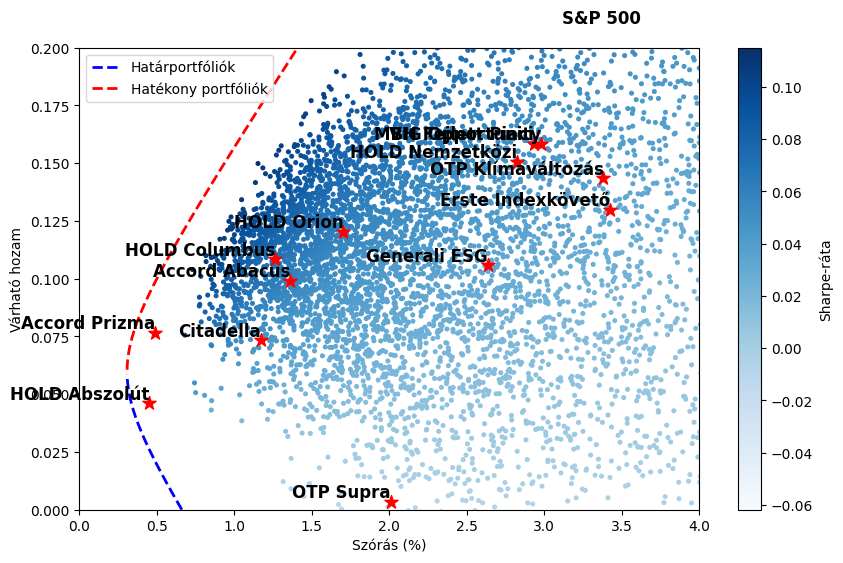

In [54]:
def calculate_returns(data):
    return data.pct_change().dropna()

def portfolio_statistics(weights, returns, covariance):
    portfolio_return = np.dot(weights, returns.mean()) * 252  # Annualized return
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(covariance, weights))) * np.sqrt(252)  # Annualized volatility
    return portfolio_return, portfolio_volatility

def efficient_frontier(returns, num_portfolios, risk_free_rate):
    cov_matrix = returns.cov() * 252  # Annualize the covariance matrix
    expected_returns = returns.mean() * 252  # Annualize the returns
    num_assets = len(expected_returns)
    results = np.zeros((4, num_portfolios))

    for i in range(num_portfolios):
        weights = np.random.randn(num_assets)*1000
        weights /= np.sum(weights)        
        portfolio_return, portfolio_volatility = portfolio_statistics(weights, returns, cov_matrix)
        results[0,i] = portfolio_volatility
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_volatility  # Sharpe ratio

    return results

def minimum_variance_portfolio(cov_matrix):
    num_assets = len(cov_matrix)
    args = (cov_matrix,)
    constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})
    bounds = tuple((0, 1) for asset in range(num_assets))
    result = minimize(lambda weights, cov: np.dot(weights.T, np.dot(cov, weights)),
                      num_assets * [1. / num_assets,],
                      args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result.x

def market_portfolio(returns, covariance, risk_free_rate):
    num_assets = len(returns)
    args = (returns, covariance, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})
    bounds = tuple((0, 1) for asset in range(num_assets))
    result = minimize(lambda weights, returns, cov, rf: -(np.dot(weights, returns) - rf) / np.sqrt(np.dot(weights.T, np.dot(cov, weights))),
                      num_assets * [1. / num_assets,],
                      args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result.x

def plot_efficient_frontier(results, exact_frontier_returns, exact_frontier_volatilities, 
                            mvp_return, mvp_volatility, market_return, market_volatility, 
                            risk_free_rate, min_x, max_x, min_y, max_y,returns, tickers):
    plt.figure(figsize=(10, 6))
    plt.xlim(min_x, max_x )  # Volatility range
    plt.ylim(min_y, max_y )  # Expected return range

    plt.scatter(results[0,:], results[1,:], c=results[2,:], cmap='Blues', marker='o', s=7, alpha=1)
    plt.colorbar(label='Sharpe-ráta')
    min_vol =  np.array(exact_frontier_volatilities).min()
    min_vol_pos = np.where(np.array(exact_frontier_volatilities) == min_vol)[0][0]
    print(min_vol_pos)
    plt.plot(exact_frontier_volatilities[:min_vol_pos], exact_frontier_returns[:min_vol_pos], 'b--', label='Határportfóliók', linewidth=2)
    
    plt.plot(exact_frontier_volatilities[min_vol_pos:], exact_frontier_returns[min_vol_pos:], 'r--', label='Hatékony portfóliók', linewidth=2)
    for tick in tickers:
       
        plt.scatter(np.sqrt(returns[tick].var())* 252, returns[tick].mean()* 252, color='red', marker='*', s=100, zorder=2, )
        plt.text(np.sqrt(returns[tick].var())* 252, returns[tick].mean()* 252, tick, fontsize=12, fontweight="bold", verticalalignment='bottom', horizontalalignment='right', color='black')

    plt.xlabel('Szórás (%)')
    plt.ylabel('Várható hozam')
    plt.legend()

num_portfolios=10000
min_x, max_x = 0, 4
min_y, max_y = 0.0, 0.2
tickers = df.columns
returns = calculate_returns(df)
results = efficient_frontier(returns, num_portfolios, annual_risk_free_rate)
mu = returns.mean() * 252  
Sigma = returns.cov() * 252  
Sigma_inv = np.linalg.inv(Sigma)
ones = np.ones(len(mu))
U = np.vstack([mu, ones]).T
M = U.T@ (Sigma_inv@ U)
M_inv = np.linalg.inv(M)
desired_returns = np.linspace(min_y, max_y , 100)
exact_weights_list = []
exact_risk_list = []

for desired_return in desired_returns:
    u = np.array([desired_return, 1])
    w_star = Sigma_inv@ U@ M_inv@u
    # print(w_star)
    portfolio_risk = np.sqrt(np.dot(w_star.T, np.dot(Sigma, w_star))) * np.sqrt(252)
    exact_weights_list.append(w_star)
    exact_risk_list.append(portfolio_risk)

mvp_weights = minimum_variance_portfolio(Sigma)
mvp_return, mvp_volatility = portfolio_statistics(mvp_weights, returns, Sigma)
market_weights = market_portfolio(mu, Sigma, annual_risk_free_rate)
market_return, market_volatility = portfolio_statistics(market_weights, returns, Sigma)
plot_efficient_frontier(results, desired_returns, exact_risk_list, mvp_return, mvp_volatility, market_return, market_volatility, annual_risk_free_rate, min_x, max_x, min_y, max_y, returns, tickers)

plt.show()
